# Form comparing

Main idea is to analize form dependency (such as flat, needle, cube, sphere and even different packings for metastructure) for different sizes

Please, before edditing this file run this command in shell
```bash
git update-index --skip-worktree Code/FormComparing.ipynb
```

It's necessary to avoid adding changes, based on 
calculations for different structures.

If there is neccessary changes in open or save functions,
you could run this command in shell:

```bash
git update-index --no-skip-worktree Code/FormComparing.ipynb
```

## Calculating and saving parameters: Example

In [7]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
import matplotlib.pyplot as plt

# Params['Packing'] = 'Ellipse'
# Type = 'border'
# Params['N'], Params['Shape'] = to3D(7, 7, 7, 'zyx', Type=Type)
# Rings_dict = Packings[Params['Packing']](Params)
# Rings_list = np.concatenate([Rings_dict[pos] for pos in Rings_dict])

# from Impedance_matrix import Matrix
# # f_0 = 6.43 MHz, omega_0 = 2 * pi * f_0
# omega_0 = 2 * np.pi * 6.43 * 10 ** 6
# Z = 0+Matrix(Rings_list) * 1j * omega_0 + np.diag(np.ones(len(Rings_list))) * (Params['R'] + 1j * omega_0 * Params['L'] + 1 / (1j * omega_0 * Params['C']))
# # Save matrix to txt file

# with open ('Matrix.txt', 'w') as f:
#     for i in range(len(Z)):
#         for j in range(len(Z[i])):
#             if i==j and j!=len(Z[i])-1:
#                 f.write(str(Z[i][j])[1:-1]+' ')
#             elif i==j==len(Z[i])-1:
#                 f.write(str(Z[i][j])[1:-1])
#             elif j==len(Z[i])-1:
#                 f.write(str(Z[i][j]) + '\n')
#             else:
#                 f.write(str(Z[i][j])+' ')


In [ ]:
Params['Solver_type'] = 'Fast'
Params['Threads'] = 1

for n in range(100, 101):
    Params['N'], Params['Shape'] = to3D(n, 1, 1, 'zyx')
    save('DATA', Params)

In [ ]:
Params['N'], Params['Shape'] = to3D(10, 10, 10, 'zyx', Type = 'center')
Params['Solver_type'] = 'Fast'
save('DATA_Center', Params)


dict_keys(['Params', 'Polarization', 'Omega', 'Phi_0z', 'MiddleZZ', 'MiddleZY'])


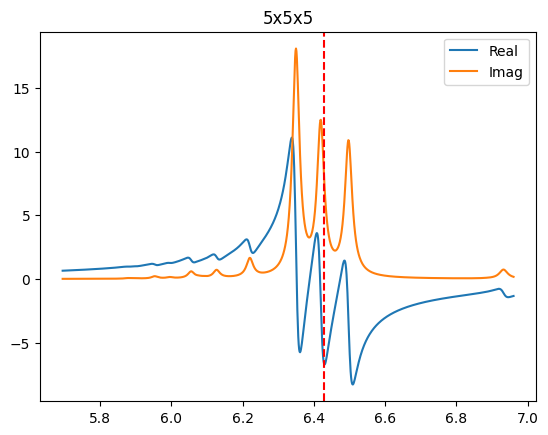

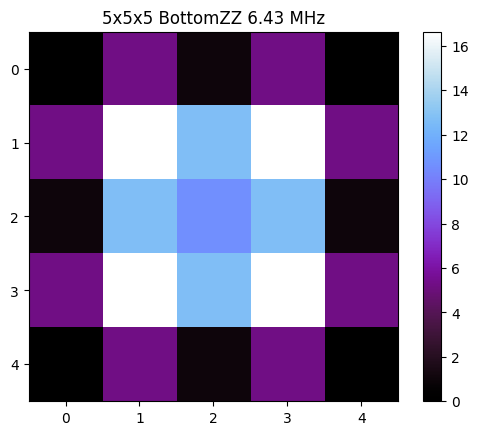

In [15]:
import colormaps as cmaps
Params['Packing'] = 'Ellipse'
Params['N'], Params['Shape'] = to3D(5, 5, 5, 'zyx', Type = 'border')
Params['Solver_type'] = 'Fast'
data = open_model('DATA_border', Params, Polarization=True, Currents=False)
print(data.keys())
nomega = 580

plt.title(Params['Shape'])
plt.plot(data['Omega']/2/np.pi/1e6, data['Polarization'][:, 0].real, label='Real')
plt.plot(data['Omega']/2/np.pi/1e6, data['Polarization'][:, 0].imag, label='Imag')
plt.axvline(data['Omega'][nomega]/2/np.pi/1e6, color='r', linestyle='--')
plt.legend()
plt.show()


BottomZZCurrents = data['MiddleZZ'].reshape((
    len(data['Omega']),
    Params['N']['z']['ny'],
    Params['N']['z']['nx'])) * Params['P_0z'] 
plt.title(Params['Shape'] + ' BottomZZ ' + str(round(data['Omega'][nomega]/2/np.pi/1e6, 2)) + ' MHz')
plt.imshow(np.abs(BottomZZCurrents[nomega, :, :]),
           cmap = cmaps.voltage)
plt.colorbar()

In [ ]:
Params['N'], Params['Shape'] = to3D(10, 10, 10, 'zyx')
Params['Solver_type'] = 'Straight'

In [ ]:
save('DATA', Params)

## Plotting graphs for chi

### Comparing Exact structures and theory on spectra

In [ ]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
import matplotlib.pyplot as plt

import colormaps as cmaps
import numpy as np

# Getting data sets for cube structures

data_discrete = []
data_center = []
data_open = []

N_dmm = np.array([12, 17, 25, 35, 50, 70, 100])
for n in N_dmm:
    Params['N'], Params['Shape'] = to3D(n, n, n, 'zyx')
    Params['Packing'] = 'Rectangle'
    data_discrete.append(open_model('DATA_border', Params))
    data_center.append(open_model('DATA_center', Params))
    data_open.append(open_model('DATA_open', Params))

# Getting data sets for DDA calculations

data_dda = []
N_dda = np.array([8, 16, 32, 64, 128, 256])
for n in N_dda:
    data = np.load(f'DATA_DDA/grid{n}_pol.npz')
    polarization = data['Polarization'].reshape(len(data['Omega']), 1)
    data_dict = dict(data)
    data_dict['Polarization'] = polarization
    data_dda.append(data_dict)

data_hp = np.load('DATA_DDA/HP_pol.npz')

# Choosing colormaps for DDA and discrete solutions

dda_colormap = plt.cm.hot
discrete_colomap = cmaps.voltage

# Plotting discrete spectra

fig0, ax0 = plt.subplots(1, 1, figsize=(12, 6))
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 6))
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))
fig3, ax3 = plt.subplots(1, 1, figsize=(12, 6))

Axes = [ax0, ax1, ax2, ax3]
Datas = [data_discrete, data_center, data_open, data_dda]
Ns = [N_dmm, N_dmm, N_dmm, N_dda]
Colormaps = [discrete_colomap, discrete_colomap, discrete_colomap, dda_colormap]


for ax, N, Data, colmap in zip(Axes, Ns, Datas, Colormaps):
    for i, data in enumerate(Data):
        ax.plot(data['Omega']/2/np.pi/1e6,
                   data['Polarization'][:, 0].imag,
                   color=colmap((len(N)-i)/len(N) * 0.6 + 0.1),
                   label = f'{N[i]}'
                )
        
    # Plotting HP-theory spectra
    ax.plot(
        data_hp['Omega']/2/np.pi/1e6,
        data_hp['Polarization'].imag,
        label='HP',
        color='black',
        linestyle='dotted',
        zorder = np.inf,
        linewidth=5
    )
    ax.set_xlabel('Frequency, MHz')
    ax.set_ylabel('Imaginary part of polarization')
    ax.set_xlim(6.2, 6.7)
    ax.legend()
    ax.grid(True)


ax0.set_title('DMM "border" cube spectra')
ax1.set_title('DMM "center" cube spectra')
ax2.set_title('DMM "open" cube spectra')
ax3.set_title('DDA spectra')

fig0.savefig('Images/Plots/DMM_border_cube_converging.png', dpi = 300)
fig1.savefig('Images/Plots/DMM_center_cube_converging.png', dpi = 300)
fig2.savefig('Images/Plots/DMM_open_cube_converging.png', dpi = 300)
fig3.savefig('Images/Plots/DDA_converging.png', dpi = 300)

# Plot highest resolution DDA spectrum, DMM-border spectrum and HP-theory spectrum

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.rcParams['lines.linewidth'] = 2.5
ax.plot(
    data_hp['Omega']/2/np.pi/1e6,
    data_hp['Polarization'].imag,
    label='HP',
    color='black',
    linestyle='dotted',
    zorder = np.inf,
    linewidth=5
)

ax.plot(
    data_discrete[-1]['Omega']/2/np.pi/1e6,
    data_discrete[-1]['Polarization'][:, 0].imag,
    label=f'DMM "border"-{N_dmm[-1]}',
    color=discrete_colomap(0.2),
    linewidth = 2,
)

ax.plot(
    data_dda[-1]['Omega']/2/np.pi/1e6,
    data_dda[-1]['Polarization'].imag,
    label=f'DDA-{N_dda[-1]}',
    color=dda_colormap(0.6),
    linewidth = 2
)

ax.set_title('Highest resolution cube spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.2, 6.7)
ax.legend()
ax.grid(True)
plt.savefig('Images/Plots/Highest_resolution_cube_spectra2.png', dpi = 300)

# Plot highest resolution DDA spectrum, DMM-Center-open spectrum and HP-theory spectrum

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.rcParams['lines.linewidth'] = 2.5
ax.plot(
    data_hp['Omega']/2/np.pi/1e6,
    data_hp['Polarization'].imag,
    label='HP',
    color='black',
    linestyle='dotted',
    zorder = np.inf,
    linewidth=5
)

for data in [data_center, data_open]:
    if data == data_center:
        linestyle = 'dashed'
        color = discrete_colomap(0.5)
        name = '"center"'
    else:
        linestyle = 'dashdot'
        color = discrete_colomap(0.8)
        name = '"open"'
    ax.plot(
        data[-1]['Omega']/2/np.pi/1e6,
        data[-1]['Polarization'][:, 0].imag,
        label=f'DMM {name}-{N_dmm[-1]}',
        color=color,
        linewidth = 2,
        linestyle=linestyle
    )

ax.set_title('Highest resolution cube spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.2, 6.7)
ax.legend()
ax.grid(True)
plt.savefig('Images/Plots/Highest_resolution_cube_spectra1.png', dpi = 300)

# Plot highest resolution DDA spectrum, DMM spectrum and HP-theory spectrum

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.rcParams['lines.linewidth'] = 2.5
ax.plot(
    data_hp['Omega']/2/np.pi/1e6,
    data_hp['Polarization'].imag,
    label='HP',
    color='black',
    linestyle='dotted',
    zorder = np.inf,
    linewidth=5
)

for data in [data_discrete, data_center, data_open]:
    if data == data_discrete:
        linestyle = 'solid'
        color = discrete_colomap(0.2)
        name = '"border"'
    elif data == data_center:
        linestyle = 'dashed'
        color = discrete_colomap(0.5)
        name = '"center"'
    else:
        linestyle = 'dashdot'
        color = discrete_colomap(0.8)
        name = '"open"'
    ax.plot(
        data[-1]['Omega']/2/np.pi/1e6,
        data[-1]['Polarization'][:, 0].imag,
        label=f'DMM {name}-{N_dmm[-1]}',
        color=color,
        linewidth = 2,
        linestyle=linestyle
    )

ax.plot(
    data_dda[-1]['Omega']/2/np.pi/1e6,
    data_dda[-1]['Polarization'].imag,
    label=f'DDA-{N_dda[-1]}',
    color=dda_colormap(0.6),
    linewidth = 2
)

ax.set_title('Highest resolution cube spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.2, 6.7)
ax.legend()
ax.grid(True)
plt.savefig('Images/Plots/Highest_resolution_cube_spectra0.png', dpi = 300)

# Plotting DMM spectra for small cubes

fig0, ax0 = plt.subplots(1, 1, figsize=(12, 6))
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 6))
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))

N_dmm = np.array([2, 3, 4, 6, 12])
data_border = []
data_center = []
data_open = []
for n in N_dmm:
    Params['N'], Params['Shape'] = to3D(n, n, n, 'zyx')
    data_border.append(open_model('DATA_border', Params))
    data_center.append(open_model('DATA_center', Params))
    data_open.append(open_model('DATA_open', Params))

for ax, Data in zip([ax0, ax1, ax2], [data_border, data_center, data_open]):
    for i, data in enumerate(Data):
        ax.plot(data['Omega']/2/np.pi/1e6,
                   data['Polarization'][:, 0].imag,
                   color=discrete_colomap((len(N_dmm)-i)/len(N_dmm)*0.6 + 0.2),
                   label = f'{N_dmm[i]}'
                )

for ax in [ax0, ax1, ax2]:
    ax.plot(
        data_hp['Omega']/2/np.pi/1e6,
        data_hp['Polarization'].imag,
        label='HP',
        color='black',
        linestyle='dotted',
        zorder = np.inf,
        linewidth=5
    )

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('Frequency, MHz')
    ax.set_ylabel('Imaginary part of polarization')
    ax.set_xlim(6.0, 6.8)
    ax.grid(True)
    ax.legend()

ax0.set_title('DMM for small "border" cubes')
ax1.set_title('DMM for small "center" cubes')
ax2.set_title('DMM for small "open" cubes')

fig0.savefig('Images/Plots/DMM_border_cube_small.png', dpi = 300)
fig1.savefig('Images/Plots/DMM_center_cube_small.png', dpi = 300)
fig2.savefig('Images/Plots/DMM_open_cube_small.png', dpi = 300)

In [ ]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
import matplotlib.pyplot as plt
from Straight_Method import spherical_chi, effective_mu
plt.rcParams['lines.linewidth'] = 2.5
import colormaps as cmaps
import numpy as np

# Getting data sets for cube structures

data_discrete = []
data_center = []
data_open = []
coeff = 6/np.pi

N_dmm = np.array([12, 17, 25, 30, 50])
for n in N_dmm:
    Params['N'], Params['Shape'] = to3D(n, n, n, 'zyx')
    Params['Packing'] = 'Ellipse'
    data_discrete.append(open_model('Data_border', Params))
    data_center.append(open_model('DATA_Center', Params))
    data_open.append(open_model('DATA_Open', Params))

Omega = data_center[0]['Omega']
MU = effective_mu(Params)(Omega)
Theory = spherical_chi(MU)
# Choosing colormaps for discrete solutions

discrete_colomap = cmaps.voltage

# Plotting discrete spectra

fig0, ax0 = plt.subplots(1, 1, figsize=(10, 5))
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 5))

for i, data in enumerate(data_discrete):
    ax0.plot(data['Omega']/2/np.pi/1e6,
               data['Polarization'][:, 0].imag * coeff,
               color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                label = f'{N_dmm[i]}'
            )
    
for i, data in enumerate(data_center):
    ax1.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag * coeff,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
    
for i, data in enumerate(data_open):
    ax2.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag * coeff,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
for ax in [ax0, ax1, ax2]:
    ax.plot(
        Omega/2/np.pi/1e6,
        Theory.imag,
        label='Effective theory',
        color='black',
        linestyle='dotted',
        zorder = np.inf,
        linewidth=5
    )

ax0.set_title('DMM "border" sphere spectra')
ax1.set_title('DMM "center" sphere spectra')
ax2.set_title('DMM "open" sphere spectra')

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('Frequency, MHz')
    ax.set_ylabel('Imaginary part of polarization')
    ax.set_xlim(6.3, 6.55)
    ax.legend()
    ax.grid(True)

fig0.savefig('Images/Plots/DMM_border_sphere_сonverging.png', dpi = 300)
fig1.savefig('Images/Plots/DMM_center_sphere_converging.png', dpi = 300)
fig2.savefig('Images/Plots/DMM_open_sphere_converging.png', dpi=300)

    

# Plot highest resolution DDA spectrum, DMM spectrum and HP-theory spectrum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(
    Omega/2/np.pi/1e6,
    Theory.imag,
    label='Effective theory',
    color='black',
    linestyle='dotted',
    zorder = np.inf,
    linewidth=5
)
for data in [data_discrete, data_center, data_open]:
    if data == data_discrete:
        linestyle = 'solid'
        color = discrete_colomap(0.2)
        name = '"border"'
    elif data == data_center:
        linestyle = 'dashed'
        color = discrete_colomap(0.5)
        name = '"center"'
    else:
        linestyle = 'dashdot'
        color = discrete_colomap(0.8)
        name = '"open"'
    ax.plot(
        data[-1]['Omega']/2/np.pi/1e6,
        data[-1]['Polarization'][:, 0].imag * coeff,
        label=f'DMM {name}-{N_dmm[-1]}',
        color=color,
        linewidth = 2,
        linestyle=linestyle
    )


ax.set_title('Highest resolution sphere spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.3, 6.55)
ax.legend()
ax.grid(True)
plt.savefig('Images/Plots/Highest_resolution_sphere_spectra.png', dpi=300)

In [ ]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
import matplotlib.pyplot as plt
from Straight_Method import disk_chi, effective_mu
plt.rcParams['lines.linewidth'] = 2.5
import colormaps as cmaps
import numpy as np

# Getting data sets for cube structures

data_discrete = []
data_center = []
data_open = []
coeff = 4/np.pi

N_dmm = np.array([12, 17, 25, 35, 50, 70, 100])
for n in N_dmm:
    Params['N'], Params['Shape'] = to3D(1, n, n, 'zyx')
    Params['Packing'] = 'Cylinder-z'
    data_discrete.append(open_model('Data_border', Params))
    data_center.append(open_model('DATA_center', Params))
    Params['Shape'] = f'2x{n}x{n}'
    data_open.append(open_model('DATA_open', Params))

Omega = data_center[0]['Omega']
MU = effective_mu(Params)(Omega)
Theory = disk_chi(MU)
# Choosing colormaps for discrete solutions

discrete_colomap = cmaps.voltage

# Plotting discrete spectra

fig0, ax0 = plt.subplots(1, 1, figsize=(10, 5))
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 5))

for i, data in enumerate(data_discrete):
    ax0.plot(data['Omega']/2/np.pi/1e6,
               data['Polarization'][:, 0].imag * coeff,
               color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                label = f'{N_dmm[i]}'
            )
    
for i, data in enumerate(data_center):
    ax1.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag * coeff,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
    
for i, data in enumerate(data_open):
    ax2.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag * coeff,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
for ax in [ax0, ax1, ax2]:
    ax.plot(
        Omega/2/np.pi/1e6,
        Theory.imag,
        label='Effective theory',
        color='black',
        linestyle='dotted',
        zorder = np.inf,
        linewidth=5
    )

ax0.set_title('DMM "border" disk spectra')
ax1.set_title('DMM "center" disk spectra')
ax2.set_title('DMM "open" disk spectra')

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('Frequency, MHz')
    ax.set_ylabel('Imaginary part of polarization')
    ax.set_xlim(6.5, 6.9)
    ax.legend()
    ax.grid(True)

fig0.savefig('Images/Plots/DMM_border_disk_сonverging.png', dpi = 300)
fig1.savefig('Images/Plots/DMM_center_disk_converging.png', dpi = 300)
fig2.savefig('Images/Plots/DMM_open_disk_converging.png', dpi=300)
    
    

# Plot highest resolution DDA spectrum, DMM spectrum and HP-theory spectrum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(
    Omega/2/np.pi/1e6,
    Theory.imag,
    label='Effective theory',
    color='black',
    linestyle='dotted',
    zorder = np.inf,
    linewidth=5
)
for data in [data_discrete, data_center, data_open]:
    if data == data_discrete:
        linestyle = 'solid'
        color = discrete_colomap(0.2)
        name = '"border"'
    elif data == data_center:
        linestyle = 'dashed'
        color = discrete_colomap(0.5)
        name = '"center"'
    else:
        linestyle = 'dashdot'
        color = discrete_colomap(0.8)
        name = '"open"'
    ax.plot(
        data[-1]['Omega']/2/np.pi/1e6,
        data[-1]['Polarization'][:, 0].imag * coeff,
        label=f'DMM {name}-{N_dmm[-1]}',
        color=color,
        linewidth = 2,
        linestyle=linestyle
    )


ax.set_title('Highest resolution disk spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.5, 6.9)
ax.legend()
ax.grid(True)
plt.savefig('Images/Plots/Highest_resolution_disk_spectra.png', dpi=300)

In [ ]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
import matplotlib.pyplot as plt
from Straight_Method import disk_chi, effective_mu
plt.rcParams['lines.linewidth'] = 2.5
import colormaps as cmaps
import numpy as np


# Getting data sets for cube structures

data_discrete = []
data_center = []
data_open = []

N_dmm = np.array([12, 17, 25, 35, 50, 70, 100])
for n in N_dmm:
    Params['N'], Params['Shape'] = to3D(1, n, n, 'zyx')
    Params['Packing'] = 'Rectangle'
    data_discrete.append(open_model('Data_border', Params))
    data_center.append(open_model('DATA_Center', Params))
    Params['Shape'] = f'2x{n}x{n}'
    data_open.append(open_model('DATA_Open', Params))

Omega = data_center[0]['Omega']
MU = effective_mu(Params)(Omega)
Theory = disk_chi(MU)
# Choosing colormaps for discrete solutions

discrete_colomap = cmaps.voltage

# Plotting discrete spectra

fig0, ax0 = plt.subplots(1, 1, figsize=(10, 5))
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 5))

for i, data in enumerate(data_discrete):
    ax0.plot(data['Omega']/2/np.pi/1e6,
               data['Polarization'][:, 0].imag,
               color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                label = f'{N_dmm[i]}'
            )
    
for i, data in enumerate(data_center):
    ax1.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
    
for i, data in enumerate(data_open):
    ax2.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
for ax in [ax0, ax1, ax2]:
    ax.plot(
        Omega/2/np.pi/1e6,
        Theory.imag,
        label='Effective theory',
        color='black',
        linestyle='dotted',
        zorder = np.inf,
        linewidth=5
    )

ax0.set_title('DMM "border" flat spectra')
ax1.set_title('DMM "center" flat spectra')
ax2.set_title('DMM "open" flat spectra')

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('Frequency, MHz')
    ax.set_ylabel('Imaginary part of polarization')
    ax.set_xlim(6.5, 6.9)
    ax.legend()
    ax.grid(True)

fig0.savefig('Images/Plots/DMM_border_flat_сonverging.png', dpi = 300)
fig1.savefig('Images/Plots/DMM_center_flat_converging.png', dpi = 300)
fig2.savefig('Images/Plots/DMM_open_flat_converging.png', dpi=300)
    

# Plot highest resolution DDA spectrum, DMM spectrum and HP-theory spectrum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(
    Omega/2/np.pi/1e6,
    Theory.imag,
    label='Effective theory',
    color='black',
    linestyle='dotted',
    zorder = np.inf,
    linewidth=5
)
for data in [data_discrete, data_center, data_open]:
    if data == data_discrete:
        linestyle = 'solid'
        color = discrete_colomap(0.2)
        name = '"border"'
    elif data == data_center:
        linestyle = 'dashed'
        color = discrete_colomap(0.5)
        name = '"center"'
    else:
        linestyle = 'dashdot'
        color = discrete_colomap(0.8)
        name = '"open"'
    ax.plot(
        data[-1]['Omega']/2/np.pi/1e6,
        data[-1]['Polarization'][:, 0].imag,
        label=f'DMM {name}-{N_dmm[-1]}',
        color=color,
        linewidth = 2,
        linestyle=linestyle
    )


ax.set_title('Highest resolution flat spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.5, 6.9)
ax.legend()
ax.grid(True)
plt.savefig('Images/Plots/Highest_resolution_flat_spectra.png', dpi = 300)

In [ ]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
import matplotlib.pyplot as plt
from Straight_Method import needle_chi, effective_mu
plt.rcParams['lines.linewidth'] = 2.5
import colormaps as cmaps
import numpy as np

# Getting data sets for cube structures

data_discrete = []
data_center = []
data_open = []

N_dmm = np.array([12, 17, 25, 35, 50, 71, 100])
for n in N_dmm:
    Params['N'], Params['Shape'] = to3D(n, 1, 1, 'zyx')
    Params['Packing'] = 'Rectangle'
    data_discrete.append(open_model('Data_border', Params))
    data_center.append(open_model('DATA_center', Params))
    Params['Shape'] = f'{n}x{2}x{2}'
    data_open.append(open_model('DATA_open', Params))

Omega = data_center[0]['Omega']
MU = effective_mu(Params)(Omega)
Theory = needle_chi(MU)
# Choosing colormaps for discrete solutions

discrete_colomap = cmaps.voltage

# Plotting discrete spectra

fig0, ax0 = plt.subplots(1, 1, figsize=(10, 5))
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 5))

for i, data in enumerate(data_discrete):
    ax0.plot(data['Omega']/2/np.pi/1e6,
               data['Polarization'][:, 0].imag,
               color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                label = f'{N_dmm[i]}'
            )
    
for i, data in enumerate(data_center):
    ax1.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
    
for i, data in enumerate(data_open):
    ax2.plot(data['Omega']/2/np.pi/1e6,
                data['Polarization'][:, 0].imag,
                color=discrete_colomap((len(N_dmm)-i)/len(N_dmm) * 0.6 + 0.1),
                 label = f'{N_dmm[i]}'
                )
for ax in [ax0, ax1, ax2]:
    ax.plot(
        Omega/2/np.pi/1e6,
        Theory.imag,
        label='Effective theory',
        color='black',
        linestyle='dotted',
        zorder = np.inf,
        linewidth=5
    )

ax0.set_title('DMM "border" needle spectra')
ax1.set_title('DMM "center" needle spectra')
ax2.set_title('DMM "open" needle spectra')

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel('Frequency, MHz')
    ax.set_ylabel('Imaginary part of polarization')
    ax.set_xlim(6.1, 6.35)
    ax.legend()
    ax.grid(True)

fig0.savefig('Images/Plots/DMM_border_needle_сonverging.png', dpi = 300)
fig1.savefig('Images/Plots/DMM_center_needle_converging.png', dpi = 300)
fig2.savefig('Images/Plots/DMM_open_needle_converging.png', dpi=300)
    

# Plot highest resolution DDA spectrum, DMM spectrum and HP-theory spectrum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(
    Omega/2/np.pi/1e6,
    Theory.imag,
    label='Effective theory',
    color='black',
    linestyle='dotted',
    zorder = np.inf,
    linewidth=5
)
for data in [data_discrete, data_center, data_open]:
    if data == data_discrete:
        linestyle = 'solid'
        color = discrete_colomap(0.2)
        name = '"border"'
    elif data == data_center:
        linestyle = 'dashed'
        color = discrete_colomap(0.5)
        name = '"center"'
    else:
        linestyle = 'dashdot'
        color = discrete_colomap(0.8)
        name = '"open"'
    ax.plot(
        data[-1]['Omega']/2/np.pi/1e6,
        data[-1]['Polarization'][:, 0].imag,
        label=f'DMM {name}-{N_dmm[-1]}',
        color=color,
        linewidth = 2,
        linestyle=linestyle
    )


ax.set_title('Highest resolution needle spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.1, 6.35)
ax.legend()
ax.grid(True)
plt.savefig('Images/Plots/Highest_resolution_needle_spectra.png', dpi = 300)


In [ ]:
from Calc import open_model, save
from Parameters import *
from Geometry import *
import matplotlib.pyplot as plt
from Straight_Method import needle_chi, effective_mu
from Straight_Method import spherical_chi, disk_chi

import colormaps as cmaps
import numpy as np

dda_colormap = plt.cm.hot
discrete_colomap = cmaps.voltage

# Getting data sets for cube structures

data_border = {}
data_center = {}
data_open = {}
Shapes = {
    'Sphere': ['Ellipse', lambda i, Type: f"{i}x{i}x{i}"],
    'Cube': ['Rectangle', lambda i, Type: f"{i}x{i}x{i}"],
    'Disk': ['Cylinder-z',lambda i, Type: f"{1 + (Type=='open')}x{i}x{i}"],
    'Flat': ['Rectangle', lambda i, Type: f"{1 + (Type=='open')}x{i}x{i}"],
    'Needle': ['Rectangle', lambda i, Type: f"{i}x{1+(Type=='open')}x{1 + (Type=='open')}"]
}
for name in Shapes:
    coeff = 1
    if name == 'Sphere':
        coeff = 1/(np.pi/6)
    elif name == 'Disk':
        coeff = 1/(np.pi/4)
    
    Params['Packing'] = Shapes[name][0]

    Params['Shape'] = Shapes[name][1](100, 'border')
    data_border[name]= open_model('DATA_border', Params)
    data_border[name]['Polarization'] *= coeff

    Params['Shape'] = Shapes[name][1](100, 'center')
    data_center[name]= open_model('DATA_center', Params)
    data_center[name]['Polarization'] *= coeff

    Params['Shape'] = Shapes[name][1](100, 'open')
    data_open[name] = open_model('DATA_open', Params)
    data_open[name]['Polarization'] *= coeff

data_hp = np.load('DATA_DDA/HP_pol.npz')

Omega = data_center['Sphere']['Omega']
MU = effective_mu(Params)(Omega)
Theory = {}

Theory['Sphere'] = [Omega, spherical_chi(MU)]
Theory['Cube'] = [data_hp['Omega'], data_hp['Polarization']]
Theory['Disk'] = [Omega, disk_chi(MU)]
Theory['Flat'] = [Omega, disk_chi(MU)]
Theory['Needle'] = [Omega, needle_chi(MU)]

Colors = {
    'Sphere': discrete_colomap(0.3),
    'Cube': discrete_colomap(0.3),
    'Disk': discrete_colomap(0.6),
    'Flat': discrete_colomap(0.6),
    'Needle': 'black' 
}
Linestyles = {
    'Sphere': '--',
    'Cube': '-',
    'Disk': '--',
    'Flat': '-',
    'Needle': '-'
}

# Choosing colormaps for discrete solutions

cmap = cmaps.voltage

# Border
# Plot highest resolution DMM spectrum and theory Spectrum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.rcParams['lines.linewidth'] = 1
for i, name in enumerate(Shapes):
    ax.plot(
        data_border[name]['Omega']/2/np.pi/1e6,
        data_border[name]['Polarization'][:, 0].imag,
        color = Colors[name],
        linestyle = Linestyles[name],
        label = f'{name} 100'
    )
    ax.plot(
        Theory[name][0]/1e6/np.pi/2,
        Theory[name][1].imag,
        color = Colors[name],
        linestyle = Linestyles[name],
        alpha = 0.5,
        linewidth = 3,
        label = f'Theory {name}'
    )
ax.set_title('Highest resolution "border" spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.1, 6.9)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5)
ax.grid(True)
plt.savefig('Images/Plots/Shapes_highest_resolution_border_spectra.png', dpi = 300)
plt.show()

# Center
# Plot highest resolution DMM spectrum and theory Spectrum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.rcParams['lines.linewidth'] = 1
for i, name in enumerate(Shapes):
    ax.plot(
        data_center[name]['Omega']/2/np.pi/1e6,
        data_center[name]['Polarization'][:, 0].imag,
        color = Colors[name],
        linestyle = Linestyles[name],
        label = f'{name} 100'
    )
    ax.plot(
        Theory[name][0]/1e6/np.pi/2,
        Theory[name][1].imag,
        color = Colors[name],
        linestyle = Linestyles[name],
        alpha = 0.5,
        linewidth = 3,
        label = f'Theory {name}'
    )
ax.set_title('Highest resolution "center" spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.1, 6.9)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5)
ax.grid(True)
plt.savefig('Images/Plots/Shapes_highest_resolution_center_spectra.png', dpi = 300)
plt.show()

# Open
# Plot highest resolution DMM spectrum and theory Spectrum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.rcParams['lines.linewidth'] = 1
for i, name in enumerate(Shapes):
    ax.plot(
        data_open[name]['Omega']/2/np.pi/1e6,
        data_open[name]['Polarization'][:, 0].imag,
        color = Colors[name],
        linestyle = Linestyles[name],
        label = f'{name} 100'
    )
    ax.plot(
        Theory[name][0]/1e6/np.pi/2,
        Theory[name][1].imag,
        color = Colors[name],
        linestyle = Linestyles[name],
        alpha = 0.5,
        linewidth = 3,
        label = f'Theory {name}'
    )
ax.set_title('Highest resolution "open" spectra')
ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Imaginary part of polarization')
ax.set_xlim(6.1, 6.9)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5)
ax.grid(True)
plt.savefig('Images/Plots/Shapes_highest_resolution_open_spectra.png', dpi = 300)

### Dependency of resounance frequency from size

In [ ]:
# Compare exact structures
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from Calc import open_model, save
from Parameters import *
from Geometry import * 


# Compare big, average and small cube structures

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
DataFolder = 'Data_border'

N = np.concatenate([np.arange(1, 51), np.arange(60, 110, 10)]) 
Resounance_Frequence_1 = []  
Resounance_Frequence_2 = []

for n in N:
    Params['N'], Params['shape'] = to3D(n, n, n, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(max(Omega[peak_1], Omega[peak_2]))
    Resounance_Frequence_2.append(min(Omega[peak_2], Omega[peak_1]))

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)
Resounance_Frequence_2 = np.array(Resounance_Frequence_2)
Limit_Frequence_1 = Resounance_Frequence_1[-1]
Limit_Frequence_2 = Resounance_Frequence_2[-1]
delta_1 = 0.001 * Limit_Frequence_1
delta_2 = 0.001 * Limit_Frequence_2
first_after_1 = N[np.where(np.abs(Resounance_Frequence_1 - Limit_Frequence_1) < delta_1)[0][0]]
first_after_2 = N[np.where(np.abs(Resounance_Frequence_2 - Limit_Frequence_2) < delta_2)[0][0]]


plt.suptitle('Size comparing')
plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Cube_1', color = 'red', marker = 'o')
plt.plot(N, Resounance_Frequence_2/1e6/2/np.pi,
          label = 'Cube_2', color = 'red', marker = '.')
plt.fill_between([0, 100], (Limit_Frequence_1 - delta_1)/1e6/2/np.pi, (Limit_Frequence_1 + delta_1)/1e6/2/np.pi,
                 color = 'red', alpha = 0.3,
                 label = '$\pm$ 0.1% from final-1')
plt.fill_between([0, 100], (Limit_Frequence_2 - delta_2)/1e6/2/np.pi, (Limit_Frequence_2 + delta_2)/1e6/2/np.pi,
                 color = 'red', alpha = 0.3,
                 label = '$\pm$ 0.1% from final-2')
plt.axvline(x=first_after_1, color = 'red', linestyle = '--')
plt.axvline(x=first_after_2, color = 'red', linestyle = ':')
plt.text(first_after_1+1, Resounance_Frequence_1[np.where(np.abs(Resounance_Frequence_1 - Limit_Frequence_1) < delta_1)[0][0]]/1e6/2/np.pi+0.02, f'{first_after_1}', fontsize=12, color='r')
plt.text(first_after_2+1, Resounance_Frequence_2[np.where(np.abs(Resounance_Frequence_2 - Limit_Frequence_2) < delta_2)[0][0]]/1e6/2/np.pi+0.02, f'{first_after_2}', fontsize=12, color='r')

# Compare big, average and small flat structures

N = np.arange(1, 101)
Resounance_Frequence_1 = []  
Resounance_Frequence_2 = []

for n in N:
    Params['N'], Params['shape'] = to3D(1, n, n, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(Omega[peak_1])
    Resounance_Frequence_2.append(Omega[peak_2])

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)
Resounance_Frequence_2 = np.array(Resounance_Frequence_2)
Limit_Frequence_1 = Resounance_Frequence_1[-1]
Limit_Frequence_2 = Resounance_Frequence_2[-1]
delta_1 = 0.001 * Limit_Frequence_1
delta_2 = 0.001 * Limit_Frequence_2
first_after_1 = N[np.where(np.abs(Resounance_Frequence_1 - Limit_Frequence_1) < delta_1)[0][0]]
first_after_2 = N[np.where(np.abs(Resounance_Frequence_2 - Limit_Frequence_2) < delta_2)[0][0]]


plt.suptitle('Size comparing')
plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Flat_1', color = 'blue', marker = 'o')
plt.plot(N, Resounance_Frequence_2/1e6/2/np.pi,
          label = 'Flat_2', color = 'blue', marker = '.')
plt.fill_between([0, 100], (Limit_Frequence_1 - delta_1)/1e6/2/np.pi, (Limit_Frequence_1 + delta_1)/1e6/2/np.pi,
                 color = 'blue', alpha = 0.3,
                 label = '$\pm$ 0.1% from final-1')
plt.fill_between([0, 100], (Limit_Frequence_2 - delta_2)/1e6/2/np.pi, (Limit_Frequence_2 + delta_2)/1e6/2/np.pi,
                 color = 'blue', alpha = 0.3,
                 label = '$\pm$ 0.1% from final-2')
plt.axvline(x=first_after_1, color = 'blue', linestyle = '--')
plt.axvline(x=first_after_2, color = 'blue', linestyle = ':')
plt.text(first_after_1+1, Resounance_Frequence_1[np.where(np.abs(Resounance_Frequence_1 - Limit_Frequence_1) < delta_1)[0][0]]/1e6/2/np.pi+0.02, f'{first_after_1}', fontsize=12, color='blue')
plt.text(first_after_2+1, Resounance_Frequence_2[np.where(np.abs(Resounance_Frequence_2 - Limit_Frequence_2) < delta_2)[0][0]]/1e6/2/np.pi+0.02, f'{first_after_2}', fontsize=12, color='blue')

# Compare big, average and small needle structures

N = np.arange(1, 101)
Resounance_Frequence_1 = []  
Resounance_Frequence_2 = []

for n in N:
    Params['N'], Params['shape'] = to3D(n, 1, 1, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(min(Omega[peak_1], Omega[peak_2]))
    Resounance_Frequence_2.append(max(Omega[peak_1], Omega[peak_2]))

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)
Resounance_Frequence_2 = np.array(Resounance_Frequence_2)
Limit_Frequence_1 = Resounance_Frequence_1[-1]
Limit_Frequence_2 = Resounance_Frequence_2[-1]
delta_1 = 0.001 * Limit_Frequence_1
delta_2 = 0.001 * Limit_Frequence_2
first_after_1 = N[np.where(np.abs(Resounance_Frequence_1 - Limit_Frequence_1) < delta_1)[0][0]]
first_after_2 = N[np.where(np.abs(Resounance_Frequence_2 - Limit_Frequence_2) < delta_2)[0][0]]


plt.suptitle('Size comparing')
plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Needle_1', color = 'green', marker = 'o')
plt.plot(N, Resounance_Frequence_2/1e6/2/np.pi,
          label = 'Needle_2', color = 'green', marker = '.')
plt.fill_between([0, 100], (Limit_Frequence_1 - delta_1)/1e6/2/np.pi, (Limit_Frequence_1 + delta_1)/1e6/2/np.pi,
                 color = 'green', alpha = 0.3,
                 label = '$\pm$ 0.1% from final-1')
plt.fill_between([0, 100], (Limit_Frequence_2 - delta_2)/1e6/2/np.pi, (Limit_Frequence_2 + delta_2)/1e6/2/np.pi,
                 color = 'green', alpha = 0.3,
                 label = '$\pm$ 0.1% from final-2')
plt.axvline(x=first_after_1, color = 'green', linestyle = '--')
plt.axvline(x=first_after_2, color = 'green', linestyle = ':')
plt.text(first_after_1+1, Resounance_Frequence_1[np.where(np.abs(Resounance_Frequence_1 - Limit_Frequence_1) < delta_1)[0][0]]/1e6/2/np.pi+0.02, f'{first_after_1}', fontsize=12, color='green')
plt.text(first_after_2+1, Resounance_Frequence_2[np.where(np.abs(Resounance_Frequence_2 - Limit_Frequence_2) < delta_2)[0][0]]/1e6/2/np.pi+0.02, f'{first_after_2}', fontsize=12, color='green')

plt.xlabel('Units per side')
plt.ylabel('Resonance frequency, MHz')
plt.legend()
plt.show()

In [ ]:
# Compare exact structures
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from Calc import open_model, save
from Parameters import *
from Geometry import * 
import colormaps as cmaps

# Compare big, average and small cube structures

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
DataFolder = 'Data_border'

N = np.concatenate([np.arange(1, 51), np.arange(60, 110, 10)]) 
Resounance_Frequence_1 = []  

for n in N:
    Params['Packing'] = 'Rectangle'
    Params['N'], Params['shape'] = to3D(n, n, n, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(max(Omega[peak_1], Omega[peak_2]))

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)

plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Cube', color = cmaps.voltage(0.3), marker = 'o')

N = np.concatenate([np.arange(1, 41), np.arange(50, 110, 10)]) 
Resounance_Frequence_1 = []  

for n in N:
    Params['Packing'] = 'Ellipse'
    Params['N'], Params['Shape'] = to3D(n, n, n, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(max(Omega[peak_1], Omega[peak_2]))

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)

plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Sphere', color = cmaps.voltage(0.1), marker = 'o')


# Compare big, average and small flat structures

N = np.arange(1, 101)
Resounance_Frequence_1 = []  
Resounance_Frequence_2 = []

for n in N:
    Params['Packing'] = 'Rectangle'
    Params['N'], Params['Shape'] = to3D(1, n, n, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(Omega[peak_1])

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)

plt.suptitle('Size comparing')
plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Flat', color = cmaps.voltage(0.5), marker = 'o')

N = np.arange(1, 101)
Resounance_Frequence_1 = []  
Resounance_Frequence_2 = []

for n in N:
    Params['Packing'] = 'Cylinder-z'
    Params['N'], Params['Shape'] = to3D(1, n, n, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(Omega[peak_1])

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)

plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Disk', color = cmaps.voltage(0.7), marker = 'o')


# Compare big, average and small needle structures

N = np.arange(1, 101)
Resounance_Frequence_1 = []  
Resounance_Frequence_2 = []

for n in N:
    Params['Packing'] = 'Rectangle'
    Params['N'], Params['Shape'] = to3D(n, 1, 1, 'zyx')
    data = open_model(DataFolder, Params, Currents = False, Polarization = True)
    Omega = data['Omega']
    ImPol = data['Polarization'][:,0].imag
    peaks, _ = find_peaks(ImPol)
    peak_1 = peaks[np.argmax(ImPol[peaks])]
    peaks = np.delete(peaks, np.argmax(ImPol[peaks]))
    if len(peaks) == 0:
        peak_2 = peak_1
    else:
        peak_2 = peaks[np.argmax(ImPol[peaks])]
    Resounance_Frequence_1.append(min(Omega[peak_1], Omega[peak_2]))

Resounance_Frequence_1 = np.array(Resounance_Frequence_1)

plt.plot(N, Resounance_Frequence_1/1e6/2/np.pi,
          label = 'Needle', color = cmaps.voltage(0.8), marker = 'o')

plt.title('Size comparing')
plt.xlabel('Units per side')
plt.ylabel('Resonance frequency, MHz')
plt.legend()
plt.show()

## Drawing GIF

### Drawing parameters evolution

In [ ]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from tqdm import tqdm
import matplotlib.animation as anime

fig, ax = plt.subplots()
# Numbers of plots in x and y axes

def plot_GIF(i):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(12, 5)

    # Set title and space between plots

    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"Evolution of polarisability for different sizes of structure, size = {i}")
    
    # Plotting cube
    Params['N'], Params['Shape'] = to3D(i, i, i, 'zyx')
    shape_cube = Params['Shape']
    name = f'{Params["Packing"]}_NoGrad_{Params["shape"]}_{Params["Orientations"]}_{Params["Solver_type"]}'
    if os.path.exists(f"./DATA/{name}"):
        data = open_model('DATA', Params, Currents = 'False', Polarization = 'True')
        Omega = data['Omega']
        RealPolarisation = data['Polarization'][:, 0].real
        ImagPolarisation = data['Polarization'][:, 0].imag

        plt.subplot(121)
        plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape_cube}', color = 'r')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Re")

        plt.subplot(122)
        plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape_cube}', color = 'r')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Im")

    # Plotting flat
    Params['N'], Params['Shape'] = to3D(1, i, i, 'zyx')
    shape_flat = Params['Shape']
    name = f'{Params["Packing"]}_NoGrad_{Params["shape"]}_{Params["Orientations"]}_{Params["Solver_type"]}'
    if os.path.exists(f"./DATA/{name}"):
        data = open_model('DATA', Params, Currents = 'False', Polarization = 'True')
        Omega = data['Omega']
        RealPolarisation = data['Polarization'][:, 0].real
        ImagPolarisation = data['Polarization'][:, 0].imag

        plt.subplot(121)
        plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape_flat}', color = 'b')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Re")

        plt.subplot(122)
        plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape_flat}', color = 'b')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Im")
    
    # Plotting needle
    Params['N'], Params['Shape'] = to3D(i, 1, 1, 'zyx')
    shape_needle = Params['Shape']
    name = f'{Params["Packing"]}_NoGrad_{Params["shape"]}_{Params["Orientations"]}_{Params["Solver_type"]}'
    if os.path.exists(f"./DATA/{name}"):
        data = open_model('DATA', Params, Currents = 'False', Polarization = 'True')
        Omega = data['Omega']
        RealPolarisation = data['Polarization'][:, 0].real
        ImagPolarisation = data['Polarization'][:, 0].imag

        plt.subplot(121)
        plt.plot(Omega/2/np.pi/10**6, RealPolarisation, label = f'{shape_needle}', color = 'y')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Re")

        plt.subplot(122)
        plt.plot(Omega/2/np.pi/10**6, ImagPolarisation, label = f'{shape_needle}', color = 'y')
        plt.xlabel("Frequency, MHz")
        plt.ylabel("Polarisation, Im")

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = tqdm(range(1, 101)),
                          interval = 50
                          )

ani.save(f'Size_increasing.gif', writer='pillow', fps=5, dpi=100)

In [ ]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.animation as anime
import matplotlib.pyplot as plt
import numpy as np

from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
from Calc import open_model, save
from Parameters import *
from Geometry import *

from tqdm import tqdm
import os


fig, ax = plt.subplots()
# Numbers of plots in x and y axes

DataBorder = 'Data_border'
DataCenter = 'DATA_center'
DataOpen = 'Data_open'
MU = effective_mu(Params)(Omega)
Sphere = spherical_chi(MU)
Disk = disk_chi(MU)
Needle = needle_chi(MU)

# initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))



def plot_GIF(i):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(6, 5)

    global Omega

    # plt.plot(Omega/2/np.pi/1e6, Sphere.real, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    # plt.plot(Omega/2/np.pi/1e6, Disk.real, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.real, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha =0.5, label = 'Resounance_Frequency')
    # plt.subplot(122)
    # plt.plot(Omega/2/np.pi/1e6, Sphere.imag, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    plt.plot(Omega/2/np.pi/1e6, Disk.imag, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.imag, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha= 0.5, label = 'Resounance_Frequency')

    # Plotting flat
    Params['N'], Params['Shape'] = to3D(i, i, i, 'zyx')
    shape_flat = Params['Shape']
    plt.title(shape_flat)
    
    data = open_model(DataBorder, Params, Currents = False, Polarization = True)
    cdata = open_model(DataCenter, Params, Currents = False, Polarization = True)
    Params['Shape'] = f'2x{i}x{i}'
    odata = open_model(DataOpen, Params, Currents = False, Polarization = True)

    Omega = data['Omega']
    BImP = data['Polarization'][:, 0].imag
    CImP = cdata['Polarization'][:, 0].imag

    OImP = odata['Polarization'][:, 0].imag
    plt.plot(Omega/2/np.pi/10**6, BImP, label = f'{shape_flat}', color = 'blue')
    plt.plot(Omega/2/np.pi/10**6, CImP, label = f'{shape_flat}', color = 'blue', linestyle = '--')
    plt.plot(Omega/2/np.pi/10**6, OImP, label = f'{shape_flat}', color = 'blue', linestyle = '-.')

    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    plt.legend()

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = tqdm(list(range(2, 101))),
                          interval = 50
                          )

ani.save(f'Plots/GIFS/Flat_increasing.gif', writer='pillow', fps=5, dpi=100)

In [ ]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.animation as anime
import matplotlib.pyplot as plt
import colormaps as cmaps
import numpy as np

from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
from Calc import open_model, save
from Parameters import *
from Geometry import *

from tqdm import tqdm
import os


fig, ax = plt.subplots()
# Numbers of plots in x and y axes

DataBorder = 'Data_border'
DataCenter = 'DATA_center'
DataOpen = 'Data_open'

MU = effective_mu(Params)(Omega)
Sphere = spherical_chi(MU)
Disk = disk_chi(MU)
Needle = needle_chi(MU)
omega_res = 1/np.sqrt(Params['C']*Params['L'])

# initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cmap = cmaps.voltage

def plot_GIF(i, packing = 'Rectangle'):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(6, 5)

    global Omega

    plt.plot(Omega/2/np.pi/1e6, Disk.imag, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    plt.axvline(omega_res/2/np.pi/1e6,
                color = 'black',
                alpha= 0.5,
                linestyle = '--',
                label = 'Resounance_Frequency')

    # Plotting flat
    Params['N'], Params['Shape'] = to3D(1, i, i, 'zyx')
    Params['Packing'] = packing
    shape_flat = Params['Shape']
    plt.title(shape_flat)
    
    data = open_model(DataBorder, Params, Currents = False, Polarization = True)
    cdata = open_model(DataCenter, Params, Currents = False, Polarization = True)
    Params['Shape'] = f'2x{i}x{i}'
    odata = open_model(DataOpen, Params, Currents = False, Polarization = True)

    Omega = data['Omega']
    BImP = data['Polarization'][:, 0].imag
    CImP = cdata['Polarization'][:, 0].imag
    OImP = odata['Polarization'][:, 0].imag

    plt.plot(Omega/2/np.pi/10**6, BImP, label = f'Border', color = cmap(0))
    plt.plot(Omega/2/np.pi/10**6, CImP, label = f'Open', color = cmap(0.3))
    plt.plot(Omega/2/np.pi/10**6, OImP, label = f'Center', color = cmap(0.8))

    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    plt.legend()

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = tqdm(list(range(2, 101))),
                          interval = 50,
                          fargs=('Cylinder-z',)
                          )

ani.save(f'Plots/GIFS/Disk_increasing.gif',
         writer='pillow',fps=5, dpi=100,
         )

In [ ]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.animation as anime
import matplotlib.pyplot as plt
import numpy as np

from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
from Calc import open_model, save
from Parameters import *
from Geometry import *

from tqdm import tqdm
import os


fig, ax = plt.subplots()
# Numbers of plots in x and y axes

DataBorder = 'Data_border'
DataCenter = 'DATA_center'
DataOpen = 'Data_open'
MU = effective_mu(Params)(Omega)
Sphere = spherical_chi(MU)
Disk = disk_chi(MU)
Needle = needle_chi(MU)

# initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))



def plot_GIF(i):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(6, 5)

    global Omega

    plt.plot(Omega/2/np.pi/1e6, Disk.imag, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')

    # Plotting Cube
    Params['N'], Params['Shape'] = to3D(i, i, i, 'zyx')
    shape_flat = Params['Shape']
    plt.title(shape_flat)
    
    data = open_model(DataBorder, Params, Currents = False, Polarization = True)
    cdata = open_model(DataCenter, Params, Currents = False, Polarization = True)
    Params['Shape'] = f'2x{i}x{i}'
    odata = open_model(DataOpen, Params, Currents = False, Polarization = True)

    Omega = data['Omega']
    BImP = data['Polarization'][:, 0].imag
    CImP = cdata['Polarization'][:, 0].imag

    OImP = odata['Polarization'][:, 0].imag
    plt.plot(Omega/2/np.pi/10**6, BImP, label = f'{shape_flat}', color = 'blue')
    plt.plot(Omega/2/np.pi/10**6, CImP, label = f'{shape_flat}', color = 'blue', linestyle = '--')
    plt.plot(Omega/2/np.pi/10**6, OImP, label = f'{shape_flat}', color = 'blue', linestyle = '-.')

    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    plt.legend()

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = tqdm(list(range(2, 101))),
                          interval = 50
                          )

ani.save(f'Plots/GIFS/Cube_increasing.gif', writer='pillow', fps=5, dpi=100)

In [ ]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.animation as anime
import matplotlib.pyplot as plt
import numpy as np

from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
from Calc import open_model, save
from Parameters import *
from Geometry import *

from tqdm import tqdm
import os


fig, ax = plt.subplots()
# Numbers of plots in x and y axes

DataBorder = 'Data_border'
DataCenter = 'DATA_center'
DataOpen = 'Data_open'
MU = effective_mu(Params)(Omega)
Sphere = spherical_chi(MU)
Disk = disk_chi(MU)
Needle = needle_chi(MU)

# initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))



def plot_GIF(i):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(6, 5)

    global Omega

    # plt.plot(Omega/2/np.pi/1e6, Sphere.real, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    # plt.plot(Omega/2/np.pi/1e6, Disk.real, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.real, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha =0.5, label = 'Resounance_Frequency')
    # plt.subplot(122)
    # plt.plot(Omega/2/np.pi/1e6, Sphere.imag, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    plt.plot(Omega/2/np.pi/1e6, Disk.imag, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.imag, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha= 0.5, label = 'Resounance_Frequency')

    # Plotting Cube
    Params['N'], Params['Shape'] = to3D(i, i, i, 'zyx')
    shape_flat = Params['Shape']
    plt.title(shape_flat)
    
    data = open_model(DataBorder, Params, Currents = False, Polarization = True)
    cdata = open_model(DataCenter, Params, Currents = False, Polarization = True)
    Params['Shape'] = f'2x{i}x{i}'
    odata = open_model(DataOpen, Params, Currents = False, Polarization = True)

    Omega = data['Omega']
    BImP = data['Polarization'][:, 0].imag
    CImP = cdata['Polarization'][:, 0].imag

    OImP = odata['Polarization'][:, 0].imag
    plt.plot(Omega/2/np.pi/10**6, BImP, label = f'{shape_flat}', color = 'blue')
    plt.plot(Omega/2/np.pi/10**6, CImP, label = f'{shape_flat}', color = 'blue', linestyle = '--')
    plt.plot(Omega/2/np.pi/10**6, OImP, label = f'{shape_flat}', color = 'blue', linestyle = '-.')

    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    plt.legend()

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = tqdm(list(range(2, 101))),
                          interval = 50
                          )

ani.save(f'Plots/GIFS/Needle_increasing.gif', writer='pillow', fps=5, dpi=100)

In [ ]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.animation as anime
import matplotlib.pyplot as plt
import numpy as np

from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
from Calc import open_model, save
from Parameters import *
from Geometry import *

from tqdm import tqdm
import os


fig, ax = plt.subplots()
# Numbers of plots in x and y axes

DataBorder = 'Data_border'
DataCenter = 'DATA_center'
DataOpen = 'Data_open'
MU = effective_mu(Params)(Omega)
Sphere = spherical_chi(MU)
Disk = disk_chi(MU)
Needle = needle_chi(MU)

# initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))



def plot_GIF(i):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(6, 5)

    global Omega

    # plt.plot(Omega/2/np.pi/1e6, Sphere.real, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    # plt.plot(Omega/2/np.pi/1e6, Disk.real, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.real, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha =0.5, label = 'Resounance_Frequency')
    # plt.subplot(122)
    # plt.plot(Omega/2/np.pi/1e6, Sphere.imag, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    plt.plot(Omega/2/np.pi/1e6, Disk.imag, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.imag, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha= 0.5, label = 'Resounance_Frequency')

    # Plotting Cube
    Params['N'], Params['Shape'] = to3D(i, i, i, 'zyx')
    shape_flat = Params['Shape']
    plt.title(shape_flat)
    
    data = open_model(DataBorder, Params, Currents = False, Polarization = True)
    cdata = open_model(DataCenter, Params, Currents = False, Polarization = True)
    Params['Shape'] = f'2x{i}x{i}'
    odata = open_model(DataOpen, Params, Currents = False, Polarization = True)

    Omega = data['Omega']
    BImP = data['Polarization'][:, 0].imag
    CImP = cdata['Polarization'][:, 0].imag

    OImP = odata['Polarization'][:, 0].imag
    plt.plot(Omega/2/np.pi/10**6, BImP, label = f'{shape_flat}', color = 'blue')
    plt.plot(Omega/2/np.pi/10**6, CImP, label = f'{shape_flat}', color = 'blue', linestyle = '--')
    plt.plot(Omega/2/np.pi/10**6, OImP, label = f'{shape_flat}', color = 'blue', linestyle = '-.')

    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    plt.legend()

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = tqdm(list(range(2, 101))),
                          interval = 50
                          )

ani.save(f'Plots/GIFS/Disk_increasing.gif', writer='pillow', fps=5, dpi=100)

In [ ]:
# Compare evolution of polarisability for real and imaginary parts.
import matplotlib.animation as anime
import matplotlib.pyplot as plt
import numpy as np

from Straight_Method import effective_mu, spherical_chi, disk_chi, needle_chi
from Calc import open_model, save
from Parameters import *
from Geometry import *

from tqdm import tqdm
import os


fig, ax = plt.subplots()
# Numbers of plots in x and y axes

DataBorder = 'Data_border'
DataCenter = 'DATA_center'
DataOpen = 'Data_open'
MU = effective_mu(Params)(Omega)
Sphere = spherical_chi(MU)
Disk = disk_chi(MU)
Needle = needle_chi(MU)

# initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))



def plot_GIF(i):
    # Clearing figure and set figsize
    plt.clf()
    fig.set_size_inches(6, 5)

    global Omega

    # plt.plot(Omega/2/np.pi/1e6, Sphere.real, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    # plt.plot(Omega/2/np.pi/1e6, Disk.real, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.real, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha =0.5, label = 'Resounance_Frequency')
    # plt.subplot(122)
    # plt.plot(Omega/2/np.pi/1e6, Sphere.imag, alpha=0.3, linewidth = 5, label = 'theory sphere', color = 'red')
    plt.plot(Omega/2/np.pi/1e6, Disk.imag, alpha=0.3, linewidth = 5, label = 'theory disk', color = 'blue')
    # plt.plot(Omega/2/np.pi/1e6, Needle.imag, alpha=0.3, linewidth = 5, label = 'theory needle', color = 'yellow')
    #plt.axvline(omega_res/2/np.pi/1e6, color = 'black', alpha= 0.5, label = 'Resounance_Frequency')

    # Plotting Cube
    Params['N'], Params['Shape'] = to3D(i, i, i, 'zyx')
    shape_flat = Params['Shape']
    plt.title(shape_flat)
    
    data = open_model(DataBorder, Params, Currents = False, Polarization = True)
    cdata = open_model(DataCenter, Params, Currents = False, Polarization = True)
    Params['Shape'] = f'2x{i}x{i}'
    odata = open_model(DataOpen, Params, Currents = False, Polarization = True)

    Omega = data['Omega']
    BImP = data['Polarization'][:, 0].imag
    CImP = cdata['Polarization'][:, 0].imag

    OImP = odata['Polarization'][:, 0].imag
    plt.plot(Omega/2/np.pi/10**6, BImP, label = f'{shape_flat}', color = 'blue')
    plt.plot(Omega/2/np.pi/10**6, CImP, label = f'{shape_flat}', color = 'blue', linestyle = '--')
    plt.plot(Omega/2/np.pi/10**6, OImP, label = f'{shape_flat}', color = 'blue', linestyle = '-.')

    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")
    plt.legend()

        
# Make and save animation object
ani = anime.FuncAnimation(fig, plot_GIF,
                          frames = tqdm(list(range(2, 101))),
                          interval = 50
                          )

ani.save(f'Plots/GIFS/Sphere_increasing.gif', writer='pillow', fps=5, dpi=100)

### Drawing currents distribution

In [ ]:
# Making GIF for polarisation for different orientations
import numpy as np
import matplotlib.pyplot as plt
from Geometry import to3D
from Calc import open_model
from Parameters import *

# Get Data for plotting
Data = {}
nz, ny, nx = 50, 50, 50
IFCurrents = True

# BorderFolder = 'DATA_border'
# CenterFolder = 'DATA_center'
OpenFolder = 'Data_open'

Params['Packing'] = 'Rectangle'
Params['N'], Params['Shape'] = to3D(nz, ny, nx, 'zyx', 'border')
# Data[f'border_{nz}x{ny}x{nx}'] = open_model(BorderFolder, Params, Currents = IFCurrents, Polarization = True)
# Data[f'center_{nz}x{ny}x{nx}'] = open_model(CenterFolder, Params, Currents = IFCurrents, Polarization = True)
Data[f'open_{nz}x{ny}x{nx}'] = open_model(OpenFolder, Params, Currents = IFCurrents, Polarization = True)

print(Data[f'open_{nz}x{ny}x{nx}'].keys())
# Select Frequencyies
Omega = Data[f'open_{nz}x{ny}x{nx}']['Omega']

# BPol = Data[f'border_{nz}x{ny}x{nx}']['Polarization']
# CPol = Data[f'center_{nz}x{ny}x{nx}']['Polarization']
OPol = Data[f'open_{nz}x{ny}x{nx}']['Polarization']

Start_freq = 6.2 * 2 * np.pi * 1e6
End_freq = 6.7 * 2 * np.pi * 1e6
Start = np.argmin(np.abs(Omega - Start_freq))
End = np.argmin(np.abs(Omega - End_freq))
Omegacut = Omega[Start:End]
# Data[f'border_{nz}x{ny}x{nx}']['Omega'] = Omegacut
# Data[f'center_{nz}x{ny}x{nx}']['Omega'] = Omegacut
Data[f'open_{nz}x{ny}x{nx}']['Omega'] = Omegacut

# BImP = BPol[Start:End]
# CImP = CPol[Start:End]
OImP = OPol[Start:End]

# Data[f'border_{nz}x{ny}x{nx}']['Polarization'] = BImP
# Data[f'center_{nz}x{ny}x{nx}']['Polarization'] = CImP
Data[f'open_{nz}x{ny}x{nx}']['Polarization'] = OImP

if IFCurrents:
    # BCurrents = Data[f'border_{nz}x{ny}x{nx}']['Currents']
    # CCurrents = Data[f'center_{nz}x{ny}x{nx}']['Currents']
    OCurrents = Data[f'open_{nz}x{ny}x{nx}']['Currents']

    # BCurrents = BCurrents[Start:End]
    # CCurrents = CCurrents[Start:End]
    OCurrents = OCurrents[Start:End]

    # Data[f'border_{nz}x{ny}x{nx}']['Currents'] = BCurrents
    # Data[f'center_{nz}x{ny}x{nx}']['Currents'] = CCurrents
    Data[f'open_{nz}x{ny}x{nx}']['Currents'] = OCurrents

dict_keys(['Params', 'Currents', 'Omega', 'Polarization', 'Phi_0z'])
[38951911.47794661 38959871.40672518 38967831.33550376 38975791.26428233
 38983751.1930609  38991711.12183948 38999671.05061805 39007630.97939663
 39015590.90817519 39023550.83695377 39031510.76573234 39039470.69451091
 39047430.62328949 39055390.55206806 39063350.48084664 39071310.4096252
 39079270.33840378 39087230.26718235 39095190.19596092 39103150.1247395
 39111110.05351807 39119069.98229665 39127029.91107522 39134989.83985379
 39142949.76863236 39150909.69741093 39158869.62618951 39166829.55496808
 39174789.48374666 39182749.41252523 39190709.3413038  39198669.27008237
 39206629.19886094 39214589.12763952 39222549.05641809 39230508.98519666
 39238468.91397524 39246428.84275381 39254388.77153239 39262348.70031095
 39270308.62908953 39278268.5578681  39286228.48664667 39294188.41542525
 39302148.34420382 39310108.2729824  39318068.20176097 39326028.13053954
 39333988.05931811 39341947.98809668 39349907.91687526 39

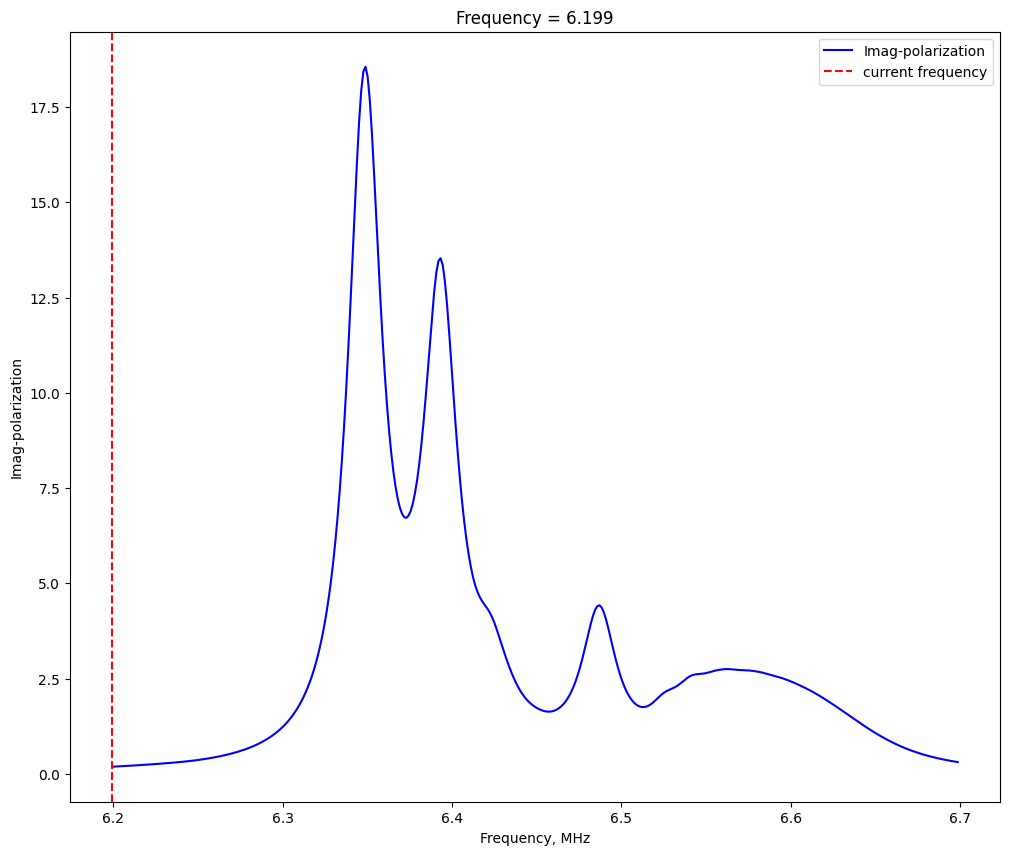

In [19]:
# Saving polarization with a red dashed line for the variance of frequency
from matplotlib.animation import FuncAnimation

def save_polarization(DATA, name, pol_type = 'Imag'):
    Omega = DATA['Omega']
    Polarization = DATA['Polarization']
    if pol_type == 'Imag':
        Pol = Polarization[:, 0].imag
    else:
        Pol = Polarization[:, 0].real
    fig = plt.figure(figsize=(12, 10))
    plt.plot(Omega/2/np.pi/10**6, Pol, label = f'{pol_type}-polarization', color = 'b')
    omega = plt.axvline(Omega[0]/2/np.pi/1e6, color = 'red', linestyle = '--', label = 'current frequency')
    plt.xlabel('Frequency, MHz')
    plt.ylabel(f'{pol_type}-polarization')
    plt.legend()
    def plot_i(i):
        omega.set_xdata([Omega[i]/2/np.pi/1e6])
        plt.title(f'Frequency = {round(Omega[i]/2/np.pi/1e6, 3)}')
    
    ani = FuncAnimation(fig, plot_i,
                        frames = range(len(Omega)),
                        interval = 50)
    ani.save(f'{name}_{pol_type}.gif', fps=30)
    ani.save(f'{name}_{pol_type}.mp4', fps=30)
    

for shape in Data:
    save_polarization(Data[shape], f'Images/Current_distribution/Form/Zrings/{Params['Packing']}-{shape}-{Params['Solver_type']}', pol_type='Imag')

Saving:  open_50x50x50 z z 0



 98%|█████████▊| 39/40 [00:34<00:00,  1.13it/s]












































































































































































































































































































































































































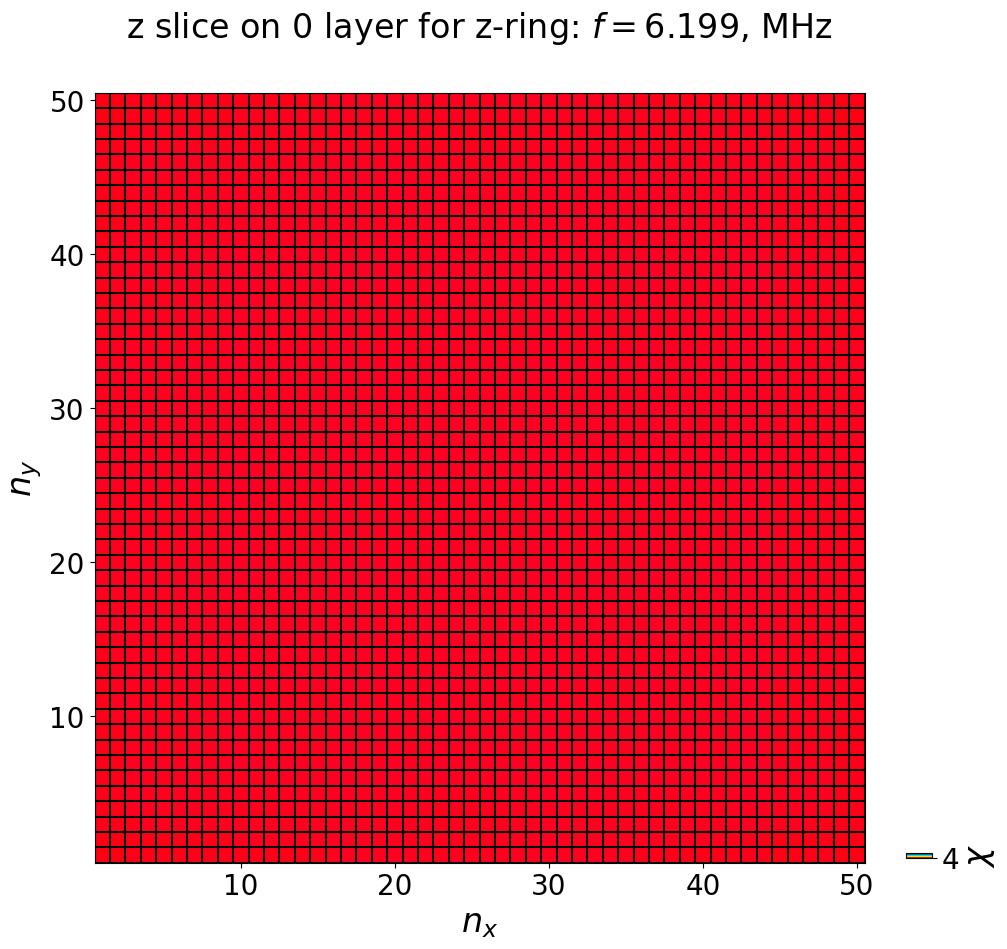

In [26]:
# Calculate polarisation for slices
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anime
from tqdm import tqdm
import colormaps as cmaps
import os

# Drawing GIFs
current_part = {
    'abs': lambda x: np.abs(x),
    'real': lambda x: np.real(x),
    'imag': lambda x: np.imag(x),
    'angle': lambda x: np.angle(x)
}

def SaveDistribution(Data, rtype, slice_deep, slice_or, name, Folder = '', mode = 'abs'):
    Currents_4D = Data['Currents']
    Omega = np.array(Data["Omega"])
    part = current_part[mode]
    Params = Data['Params']
    N = Params['N']

    start = 0
    for ring_type in N:
        if ring_type != rtype:
            start += np.prod([N[ring_type][j] for j in N[ring_type]])
        else:
            break
    end = start + np.prod([N[rtype][j] for j in N[rtype]])

    rslice = [slice(slice_deep * (slice_or =='z'), (slice_deep+1)*(slice_or=='z') + N[rtype]['nz'] * (slice_or != 'z'), 1),
      slice(slice_deep * (slice_or =='y'), (slice_deep+1)*(slice_or=='y') + N[rtype]['ny'] * (slice_or != 'y'), 1),
      slice(slice_deep * (slice_or =='x'), (slice_deep+1)*(slice_or=='x') + N[rtype]['nx'] * (slice_or != 'x'), 1)]
    
    shape = [len(Omega)]+[N[rtype][j] for j in N[rtype]]
    squeeze_or = 1 if slice_or == 'z' else 2 if slice_or == 'y' else 3

    # Find currents on slice
    if Currents_4D.shape == (0,):
        print('Empty current array, no gifs')
        return 0
    Currents2D = Currents_4D[:,start:end].reshape(shape)[:, *rslice]*Params['P_0z']
    
    # convert 3D data to 2D along slice_or axis
    Currents2D = np.squeeze(part(Currents2D), axis = squeeze_or) 

    # Contourf can't plot 1D data, so we need to repeat it
    if Currents2D.shape[1] == 1:
        Currents2D = np.repeat(Currents2D, 2, axis = 1)
    if Currents2D.shape[2] == 1:
        Currents2D = np.repeat(Currents2D, 2, axis = 2)
    
    
    # Calculate extremums for each slice
    MaxCurrents = Currents2D.max()
    MinCurrents = Currents2D.min()
    MaxDeltaCurrents = MaxCurrents - MinCurrents

    fig_currents, ax_currents = plt.subplots(figsize = (12, 10))
    
    if slice_or == 'z':
        n_1, n_2 = r'$n_x$', r'$n_y$'
    elif slice_or == 'y':
        n_1, n_2 = r'$n_x$', r'$n_z$'
    else:
        n_1, n_2 = r'$n_y$', r'$n_z$'
    
    X, Y = list(range(1, N[rtype][n_1[1]+n_1[3]]+1)), list(range(1, N[rtype][n_2[1]+n_2[3]]+1))
    if len(X) == 1:
        X = [0, 1]
    if len(Y) == 1:
        Y = [0, 1]

    def plot_GIF(i):
        plt.clf()
        
        fig_currents.set_size_inches((10.8, 10))

        Currents = Currents2D[i]
        omega = Omega[i]

        Lines = plt.contour(X, Y, Currents, np.min([len(X), len(Y), 6]), colors = 'black', alpha = 0.01)
        
        Imax, Imin = Currents.max(), Currents.min()
        DeltaCurrents = Imax - Imin
        
        amplitude = DeltaCurrents/MaxDeltaCurrents/2
        if amplitude == 0:
            amplitude = 0.01
        if MaxDeltaCurrents - DeltaCurrents == 0:
            middlepos = 0.5
        else:
            middlepos = (Imin-MinCurrents)/(MaxDeltaCurrents - DeltaCurrents)
        ticksnumber = round(amplitude * 10) + 1
        
        ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

        plt.xlabel(n_1, fontsize = 24)
        plt.ylabel(n_2, fontsize = 24)
        
        # Choosing color map

        #plt.contourf(X, Y, Currents, 100, cmap=cmaps.voltage)
        #plt.pcolormesh(X, Y, Currents.T, cmap=cmaps.voltage, shading='auto')
        plt.imshow(Currents, cmap="gist_rainbow", origin='lower',
                   vmin=MinCurrents, vmax=MaxCurrents,
				   extent = [X[0]-1/2, X[-1]+1/2, Y[0]-1/2, Y[-1]+1/2])
        
        plt.clabel(Lines, inline=1, fontsize=15)
        cbar = plt.colorbar(label = r'$\chi$', fraction = 0.03, pad = 0.05, 
                          shrink = 10, aspect = amplitude/0.03, anchor = (0, middlepos),
                          ticks = ticks)
        cbar.set_label(r'$\chi$', fontsize = 24)
        cbar.ax.tick_params(labelsize=20)

        plt.title(f"{slice_or} slice on {slice_deep} layer for {rtype}-ring: $f =${round(omega/2/np.pi/10 ** 6, 3)}, MHz",
                  fontsize = 24,
                  pad = 40)
        
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.axis('equal')
        for x in X:
            plt.axvline(x-1/2, color = 'black')
        plt.axvline(X[-1]+1/2, color = 'black')
        #plt.axvline(X[-1]+1, color = 'black')
        for y in Y:
            plt.axhline(y-1/2, color = 'black')
        plt.axhline(Y[-1]+1/2, color = 'black')
        #plt.axhline(Y[-1]+1, color = 'black')
    
    ani = anime.FuncAnimation(fig_currents, plot_GIF,
                              frames = tqdm(list(range(len(Omega)))),
                              interval = 50
                              )
    if not os.path.exists(folder):
        os.makedirs(folder)
    ani.save(f'{folder}/{name}.gif', fps=30)
    ani.save(f'{folder}/{name}.mp4', fps=30)

folder = 'Images/Current_distribution/Form/Zrings'
for shape in Data:
    data = Data[shape]
    l = int(shape.split('_')[1].split('x')[0])
    for rtype in ['z']:
        for slice_or in ['z']:
                for slice_deep in [0]:
                    print('Saving: ', shape, rtype, slice_or, slice_deep)
                    for mode in ['abs']: #['abs', 'angle']:
                        SaveDistribution(data, rtype, slice_deep, slice_or,
                                         Folder = folder,
                                         name = f'O{Params['Packing']}-{shape}-{rtype}ring-{slice_or}slice-{slice_deep}-{Params['Solver_type']}-{mode}', mode = mode)
